Pymaceuticals Inc.

Analysis

The data shows that the Capomulin and Ramicane treatment groups had smaller final tumor volume than the Infubinol and Ceftamin treatment groups. The treatment groups for Ceftamin and Infubinol had the most span in tumor volumes. The mouse weight and tumor volume in the Capomulin treatment group seems to have the most obvious positive correlation. With only one outlier in the Infubinol treatment group the data is not perfect but still allows for good visualization of each of the treatments outcomes.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
#combined_data = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
#combined_data.head()

In [2]:
# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
total_mice = len(combined_data["Mouse ID"].unique())
total_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
unique_mice = len(combined_data.groupby(["Mouse ID", "Timepoint"])) 
unique_mice

1888

In [5]:
dupe_mice = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
results = []
for mouse_id in dupe_mice:
    results.append(mouse_id)
print(results)

['g989']


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mice_all = combined_data[combined_data.duplicated(subset = ["Mouse ID", "Timepoint"])]
dupe_mice_all

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.dropna().drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='first')
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.

total_mice_clean = len(clean_df["Mouse ID"].unique())
total_mice_clean 

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

med_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
med_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
med_varianace = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
med_standard_deviation = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
med_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
stat_table = pd.DataFrame({"Mean Tumor Volume": med_mean,
                        "Median Tumor Volume": med_median,
                        "Tumor Volume Variance": med_varianace,
                        "Tumor Volume Standard Deviation": med_standard_deviation,
                        "Tumor Volume Standard Error of Mean": med_sem})
stat_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

stat_table = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(
    columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation', 'sem': 'SEM'})
stat_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='Number of Observed Mouse Timpoints'>

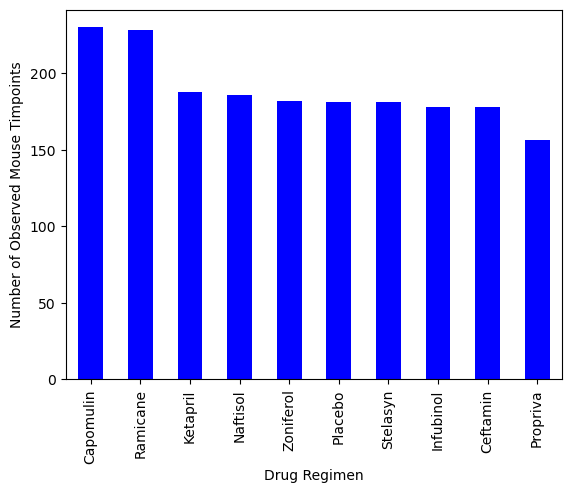

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_timepoints = clean_df[["Drug Regimen", "Timepoint"]]

drug_counts = drug_timepoints["Drug Regimen"].value_counts()

drug_counts.plot(kind="bar",color = "blue", xlabel="Drug Regimen", ylabel="Number of Observed Mouse Timpoints")

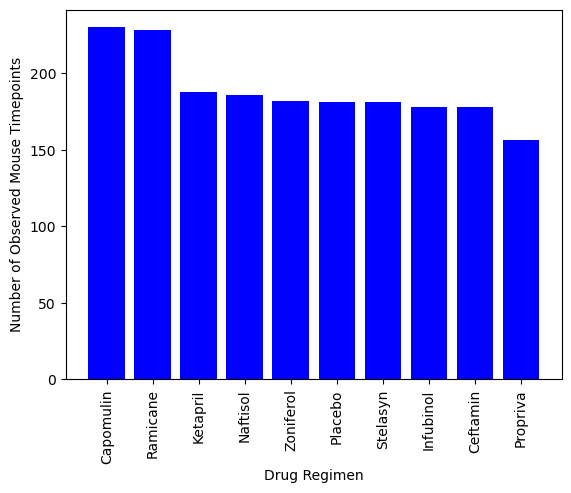

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_type = drug_counts.index.values
mice_observed = drug_counts.values

plt.bar(drug_type, mice_observed, color="blue", align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.xticks(rotation=90)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

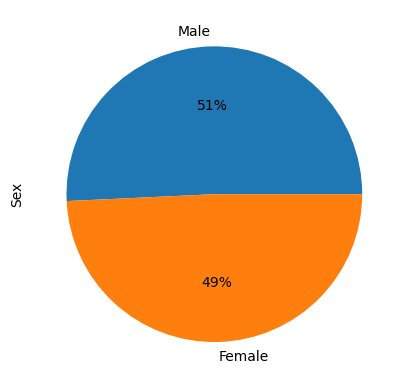

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_count = clean_df["Sex"].value_counts()
Sex = ["Male", "Female"]

gender_count.plot(kind = "pie", autopct="%1.0f%%", ylabel = "Sex")
plt.show

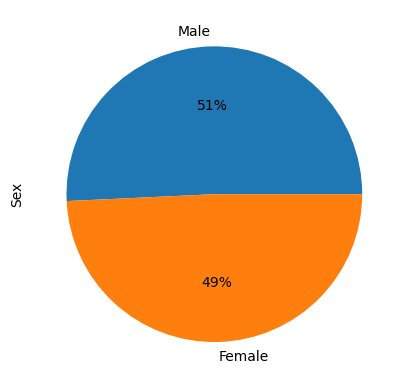

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_gender = gender_count.index.values
gender_sum = gender_count.values

plt.ylabel("Sex")
plt.pie(gender_sum, labels = mice_gender, autopct="%1.0f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drug_regimens = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") | (clean_df["Drug Regimen"] == "Ramicane") |
                                        (clean_df["Drug Regimen"] == "Infubinol") |(clean_df["Drug Regimen"] == "Ceftamin")]


In [16]:
# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = drug_regimens.groupby("Mouse ID")["Timepoint"].max()
last_timepoint_data = pd.DataFrame(last_timepoint)


In [17]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_volume = pd.merge(last_timepoint_data, clean_df, on = ["Mouse ID", "Timepoint"])
last_volume


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [18]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)

tumor_volume = [[] for _ in range(len(treatments))]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

for drugindex in range(len(last_volume)):
    for treatmentindex in range(len(treatments)):
        if last_volume.loc[drugindex, "Drug Regimen"] == treatments[treatmentindex]:
            tumor_volume[treatmentindex].append(last_volume.loc[drugindex, "Tumor Volume (mm3)"])
            
outlier = []

for x in range(len(tumor_volume)):
    quartiles = pd.Series(tumor_volume[x]).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    for y in range(len(tumor_volume[x])):   
        if (tumor_volume[x][y] < lower_bound) or (tumor_volume[x][y] > upper_bound):
            outlier.append(tumor_volume[x][y])
            
    print(f"{treatments[x]}'s potential outliers {outlier}.")
    outlier = []


Capomulin's potential outliers [].
Ramicane's potential outliers [].
Infubinol's potential outliers [36.3213458].
Ceftamin's potential outliers [].


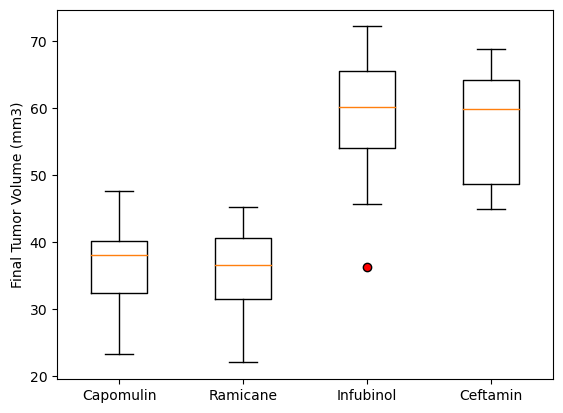

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_volume, flierprops=dict(markerfacecolor='red'))
ax1.set_xticklabels(treatments)

plt.show()


## Line and Scatter Plots

<Axes: title={'center': 'Capomulin treatment of mouse l509'}, xlabel='Timepoint (days)', ylabel='Tumor Volume (mm3)'>

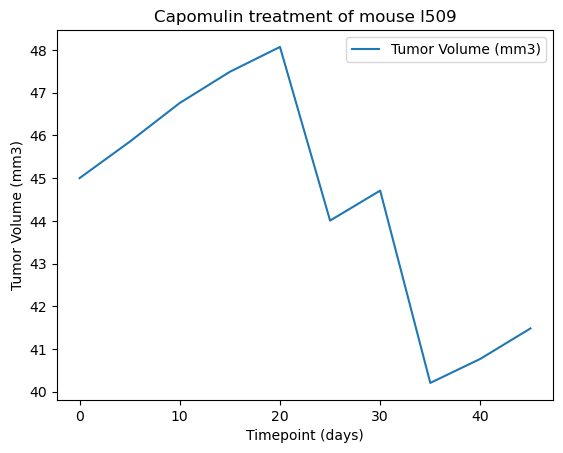

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_mouse = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") & (clean_df["Mouse ID"] == "l509"), ["Timepoint", "Tumor Volume (mm3)"]]
capomulin_mouse.set_index("Timepoint").plot(title="Capomulin treatment of mouse l509", xlabel="Timepoint (days)", ylabel="Tumor Volume (mm3)")


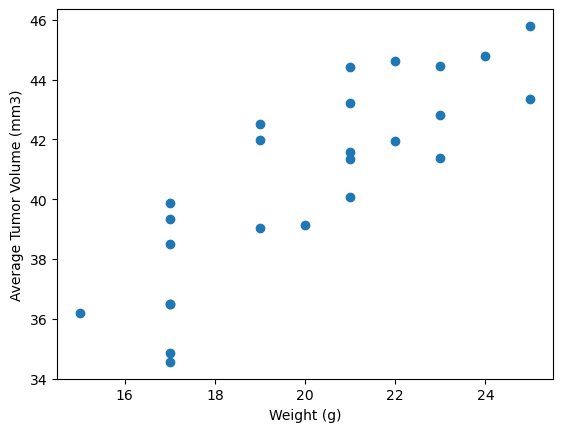

In [27]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
capomulin_average_tumor = capomulin_data.groupby("Mouse ID").mean(numeric_only = True)[["Tumor Volume (mm3)", "Weight (g)"]]

x_values = capomulin_average_tumor["Weight (g)"]
y_values = capomulin_average_tumor["Tumor Volume (mm3)"]

plt.scatter(x_values, y_values)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


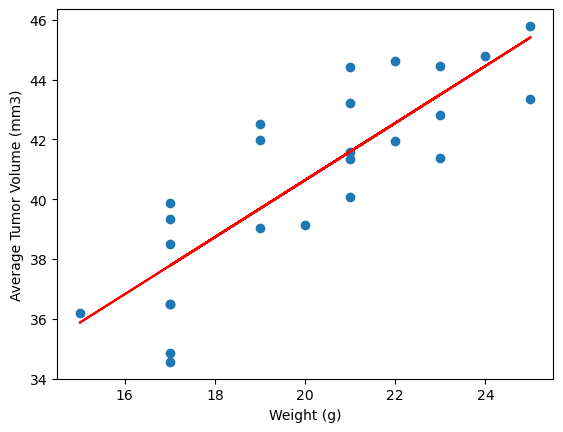

In [38]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

import scipy.stats as st
from scipy import stats

correlation_coefficient = st.pearsonr(capomulin_average_tumor["Weight (g)"], capomulin_average_tumor["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is: {round(correlation[0], 2)}")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(capomulin_average_tumor["Weight (g)"], capomulin_average_tumor["Tumor Volume (mm3)"])

linear_regression = (capomulin_average_tumor ["Weight (g)"] * slope) + intercept 

line_slope = f'y = {round(slope, 2)}x + {round(intercept, 2)}'

plt.scatter(x = capomulin_average_tumor["Weight (g)"], y = capomulin_average_tumor["Tumor Volume (mm3)"])
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

plt.plot(capomulin_average_tumor["Weight (g)"], linear_regression, color="r")

plt.show()


<Axes: xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

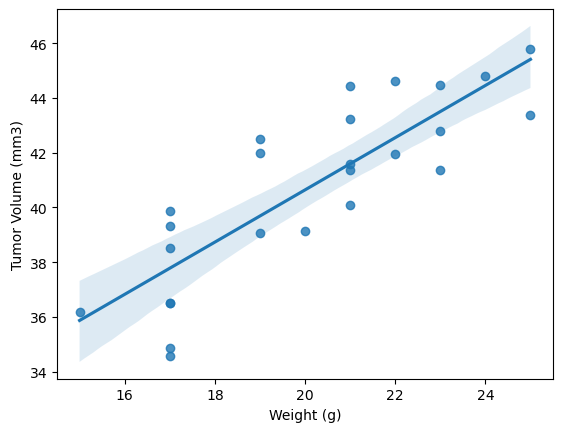

In [41]:
#Bonus scatter plot library option I found, did not use because it didn't match the provided example.

import seaborn as sns

sns.regplot(x="Weight (g)", y="Tumor Volume (mm3)", data=capomulin_average_tumor)